Customer Segmentation Using Clustering (Python)

Problem Statement:
The goal is to use K-Means clustering to group customers based on demographic and behavioral data. 
This segmentation will help businesses implement targeted marketing strategies for each group.

In [1]:
##Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Upload dataset
df=pd.read_csv(r"C:\Users\Deepa nayak\OneDrive\Desktop\Infotact\Project 2\marketing_campaign.csv",delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
##Initial Dataset Preview

In [5]:
# Step 1: Basic preview
print("Shape of dataset:", df.shape)  # Rows & columns

Shape of dataset: (2240, 29)


In [6]:
print("\nColumn names:\n", df.columns.tolist())  # All column names


Column names:
 ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [7]:
# First few rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Overview of data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Summary statistics for numerical columns
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
## Handling Nulls and Formatting 
# Check for Missing Values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
##Droping null values
df = df.dropna(subset=['Income'])

In [12]:
#Recheck for null values
df.isnull().sum().sum()

0

In [13]:
# Clean column names
df.columns = df.columns.str.strip()

In [14]:
##Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')

In [15]:
##Create a new column: "Customer_Since_Days", to calculate loyalty
df['Customer_Since_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [16]:
##Drop Unnecessary Columns
# Check if Z_CostContact and Z_Revenue have unique values
print(df['Z_CostContact'].nunique())
print(df['Z_Revenue'].nunique())

1
1


In [17]:
# Drop columns we don't need
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [18]:
##  Encoding Categorical Variables

In [19]:
##Checking the Unique Categories
print("Education:", df['Education'].unique())
print("Marital Status:", df['Marital_Status'].unique())

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [20]:
##One-Hot Encoding (Recommended for clustering)
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

In [21]:
print(df.shape)
df.head()

(2216, 35)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,True,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,...,True,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,...,True,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,26,11,4,20,10,3,...,True,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,94,173,43,118,46,27,...,False,False,True,False,False,True,False,False,False,False


In [22]:
##Step 4: Scaling features before applying K-Means

In [23]:
#Import the scaler
from sklearn.preprocessing import StandardScaler

In [24]:
#Check current DataFrame
df.dtypes.value_counts()

int64      23
bool       11
float64     1
Name: count, dtype: int64

In [25]:
#Apply scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [26]:
##Step 5: K-Means Clustering + Elbow Method

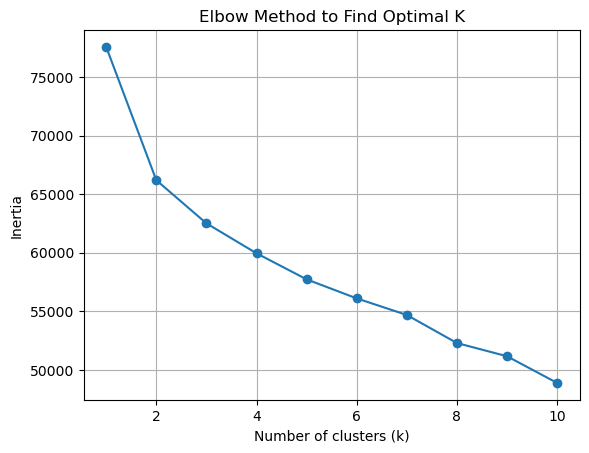

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Store inertia (sum of squared distances) for each k
inertia = []

# Try cluster counts from 1 to 10
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [28]:
##k value taken as 3

In [29]:
##Apply KMeans and visualize the clusters.

In [30]:
# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_df)

# Assign cluster labels back to original dataframe
df['Cluster'] = kmeans.labels_

In [31]:
df['Cluster'].value_counts()
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
0,1957,58138.0,0,0,58,635,88,546,172,88,...,False,False,False,False,False,True,False,False,False,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,False,False,False,False,False,True,False,False,False,1
2,1965,71613.0,0,0,26,426,49,127,111,21,...,False,False,False,False,False,False,True,False,False,2
3,1984,26646.0,1,0,26,11,4,20,10,3,...,False,False,False,False,False,False,True,False,False,1
4,1981,58293.0,1,0,94,173,43,118,46,27,...,False,True,False,False,True,False,False,False,False,1


In [32]:
##  Visualizing Clusters with PCA

In [33]:
from sklearn.decomposition import PCA

# Reduce scaled data to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']


In [34]:
## Plot the clusters

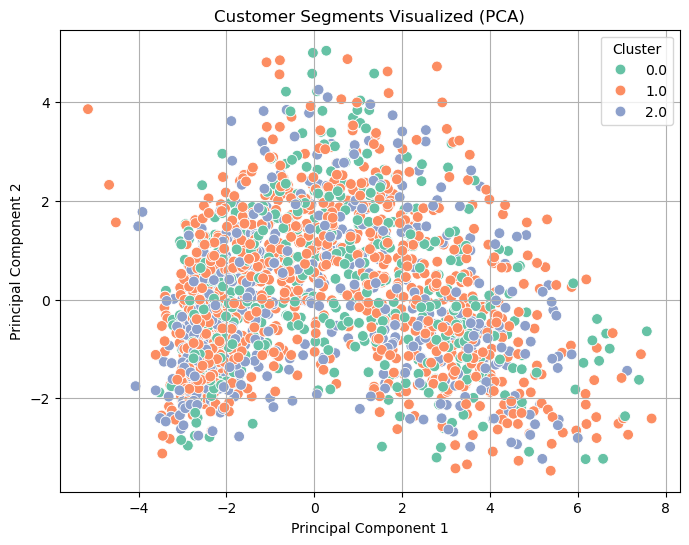

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title("Customer Segments Visualized (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [36]:
##Profiling each cluster (averages, behavior, etc.)

In [37]:
# Group by cluster and get average of each feature
cluster_profiles = df.groupby('Cluster').mean(numeric_only=True).round(1)
cluster_profiles.T  # Transpose to make it easier to read

Cluster,0,1,2
Year_Birth,1968.7,1971.7,1964.3
Income,77714.8,34915.9,58157.0
Kidhome,0.0,0.8,0.2
Teenhome,0.1,0.4,0.9
Recency,49.2,49.3,48.4
MntWines,611.0,41.6,465.6
MntFruits,69.0,5.1,23.7
MntMeatProducts,465.9,23.6,139.3
MntFishProducts,101.0,7.3,31.7
MntSweetProducts,70.4,5.2,24.7


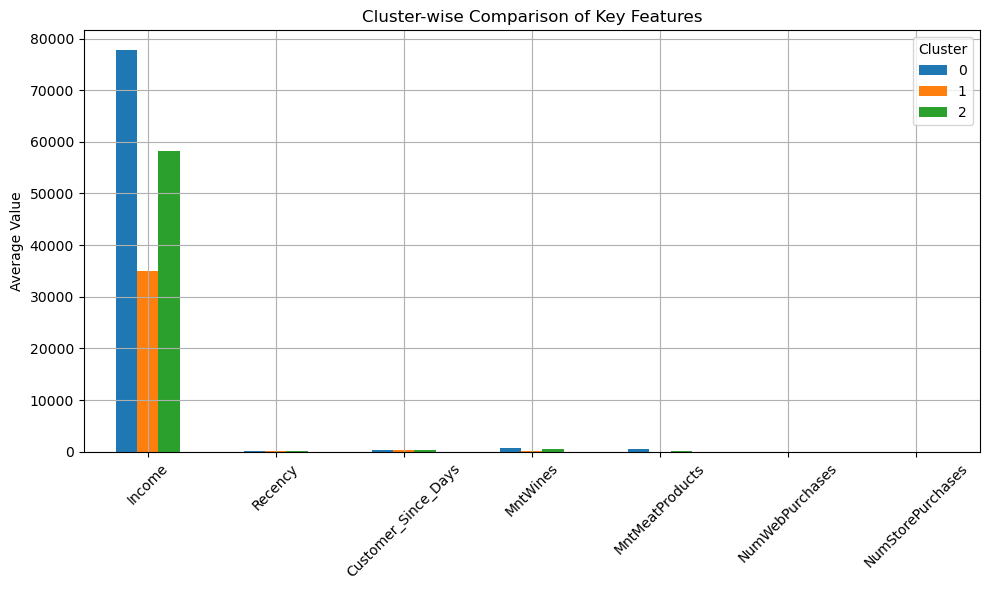

In [38]:
# Select a few important features to compare across clusters
features_to_plot = ['Income', 'Recency', 'Customer_Since_Days',
                    'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']

cluster_profiles[features_to_plot].T.plot(kind='bar', figsize=(10,6))
plt.title('Cluster-wise Comparison of Key Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
